<h1> Exploratory Analysis <h1>

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as pd
import pandas as pd
import seaborn as sns

from datetime import date

import warnings
warnings.filterwarnings('ignore')

## Import Database

In [2]:
# Import database and show spreasheet head (first 5 items)
df_total = pd.read_csv('Data/cases-brazil-states.csv')
df_total.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [3]:
# Filter out "total cases in Brazil" shown in state field (to work with data by state)
df = df_total[df_total['estado'] != 'TOTAL']

# Change date column datatype from str to date object
df['data'] = pd.to_datetime(df['data']).dt.date

# Show Dataframe
df

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.00000,0.00218,0.00000,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.00000,0.00218,0.00000,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.00000,0.00218,0.00000,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.00000,0.00436,0.00000,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.00000,0.00436,0.00000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,31,2020-07-31,Brazil,RS,TOTAL,51,1876,219,66692,1876,66692,16.48906,586.18791,0.02813,57655.0,7272.0,347092.0,3050.75775
3957,31,2020-07-31,Brazil,SC,TOTAL,59,1102,3169,84073,1102,84073,15.38078,1173.41923,0.01311,70601.0,9573.0,282607.0,3944.38747
3958,31,2020-07-31,Brazil,SE,TOTAL,26,1434,1029,58713,1434,58713,62.38319,2554.18724,0.02442,30937.0,6466.0,93587.0,4071.30825
3959,31,2020-07-31,Brazil,SP,TOTAL,287,22997,13298,542304,22997,542304,50.08161,1181.00007,0.04241,351610.0,340112.0,1788225.0,3894.29886


Text(0, 0.5, 'Deaths')

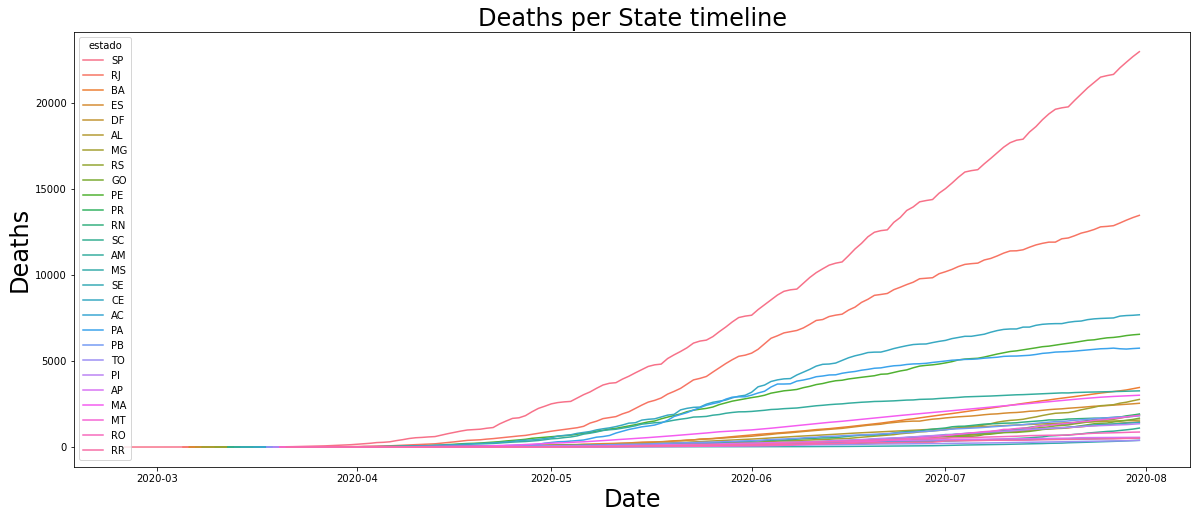

In [6]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)
fig.set_title('Deaths per State timeline', loc='center', fontsize=24)
fig.set_xlabel('Date', fontsize=24)
fig.set_ylabel('Deaths', fontsize=24)